## catanddog

In [1]:
import os

path = "../data/train/"
os.listdir(path)

['dog.1391.jpg',
 'cat.5852.jpg',
 'dog.10809.jpg',
 'cat.1004.jpg',
 'cat.6618.jpg',
 'cat.4472.jpg',
 'cat.5737.jpg',
 'cat.5194.jpg',
 'cat.3073.jpg',
 'dog.6239.jpg',
 'dog.5182.jpg',
 'dog.2810.jpg',
 'cat.6893.jpg',
 'dog.3701.jpg',
 'dog.7496.jpg',
 'dog.3682.jpg',
 'dog.5801.jpg',
 'cat.10380.jpg',
 'dog.6585.jpg',
 'cat.4301.jpg',
 'cat.264.jpg',
 'cat.8956.jpg',
 'dog.107.jpg',
 'cat.4026.jpg',
 'cat.8859.jpg',
 'cat.2029.jpg',
 'dog.9685.jpg',
 'dog.6873.jpg',
 'dog.8310.jpg',
 'dog.8286.jpg',
 'cat.5391.jpg',
 'dog.3781.jpg',
 'cat.10543.jpg',
 'cat.3902.jpg',
 'cat.3593.jpg',
 'cat.6967.jpg',
 'cat.9104.jpg',
 'dog.9746.jpg',
 'dog.9004.jpg',
 'cat.4817.jpg',
 'dog.8258.jpg',
 'dog.10696.jpg',
 'cat.1216.jpg',
 'cat.8953.jpg',
 'cat.8900.jpg',
 'dog.3749.jpg',
 'dog.1654.jpg',
 'dog.2559.jpg',
 'dog.11386.jpg',
 'dog.1271.jpg',
 'dog.8220.jpg',
 'dog.301.jpg',
 'cat.10709.jpg',
 'dog.9356.jpg',
 'dog.3593.jpg',
 'dog.3099.jpg',
 'dog.12334.jpg',
 'cat.7983.jpg',
 'dog.2827

In [2]:
full_names = os.listdir(path)

labels = []
file_id = []

for each in full_names:
   labels.append(each.split('.')[0])
   file_id.append(each.split('.')[1])


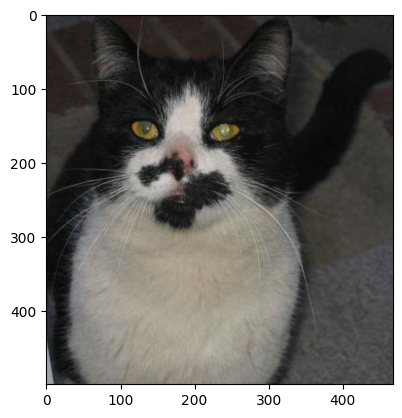

In [3]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

sample = random.choice(full_names)
image = mpimg.imread(path + sample)

plt.imshow(image)
plt.show()

사진 크기도 제각각

In [4]:
sample = random.choice(full_names)
image = mpimg.imread(path + sample)
image.shape

(375, 499, 3)

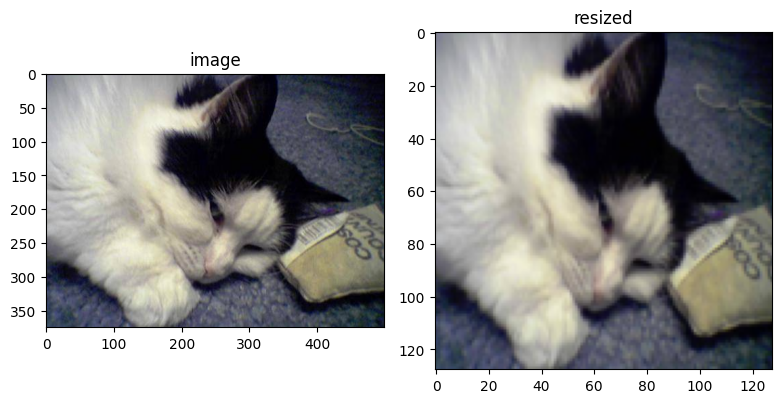

In [5]:
from skimage.transform import resize

resized = resize(image, (128, 128,3))

fig, axes = plt.subplots(1, 2, figsize=(8,4))
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title("image")
ax[1].imshow(resized, cmap=plt.cm.gray)
ax[1].set_title("resized")

fig.tight_layout()
plt.show()

### 크기 다 바꾸기

In [7]:
from tqdm import tqdm
from skimage.color import  rgb2gray
import numpy as np


images = []

bar_total = tqdm(full_names[:5000])
for file in bar_total:
    image = mpimg.imread(path+file)
    images.append(resize(image, (128,128,3)))

images = np.array(images)

100%|██████████| 5000/5000 [01:10<00:00, 70.80it/s]


In [8]:
images.shape, labels[:3]

((5000, 128, 128, 3), ['dog', 'cat', 'dog'])

In [9]:
labels = labels[:5000]

In [11]:
len(images)

5000

### 라벨 인코딩

In [12]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(labels)
labels_encoded = encoder.transform(labels)
labels_encoded[:3], encoder.classes_

(array([1, 0, 1]), array(['cat', 'dog'], dtype='<U3'))

In [13]:
from sklearn.model_selection import train_test_split

trdt, tedt, trlb, telb = train_test_split(images, labels_encoded, 
                        test_size=0.2, random_state =13, 
                        stratify=labels_encoded)

trdt.shape, tedt.shape

((4000, 128, 128, 3), (1000, 128, 128, 3))

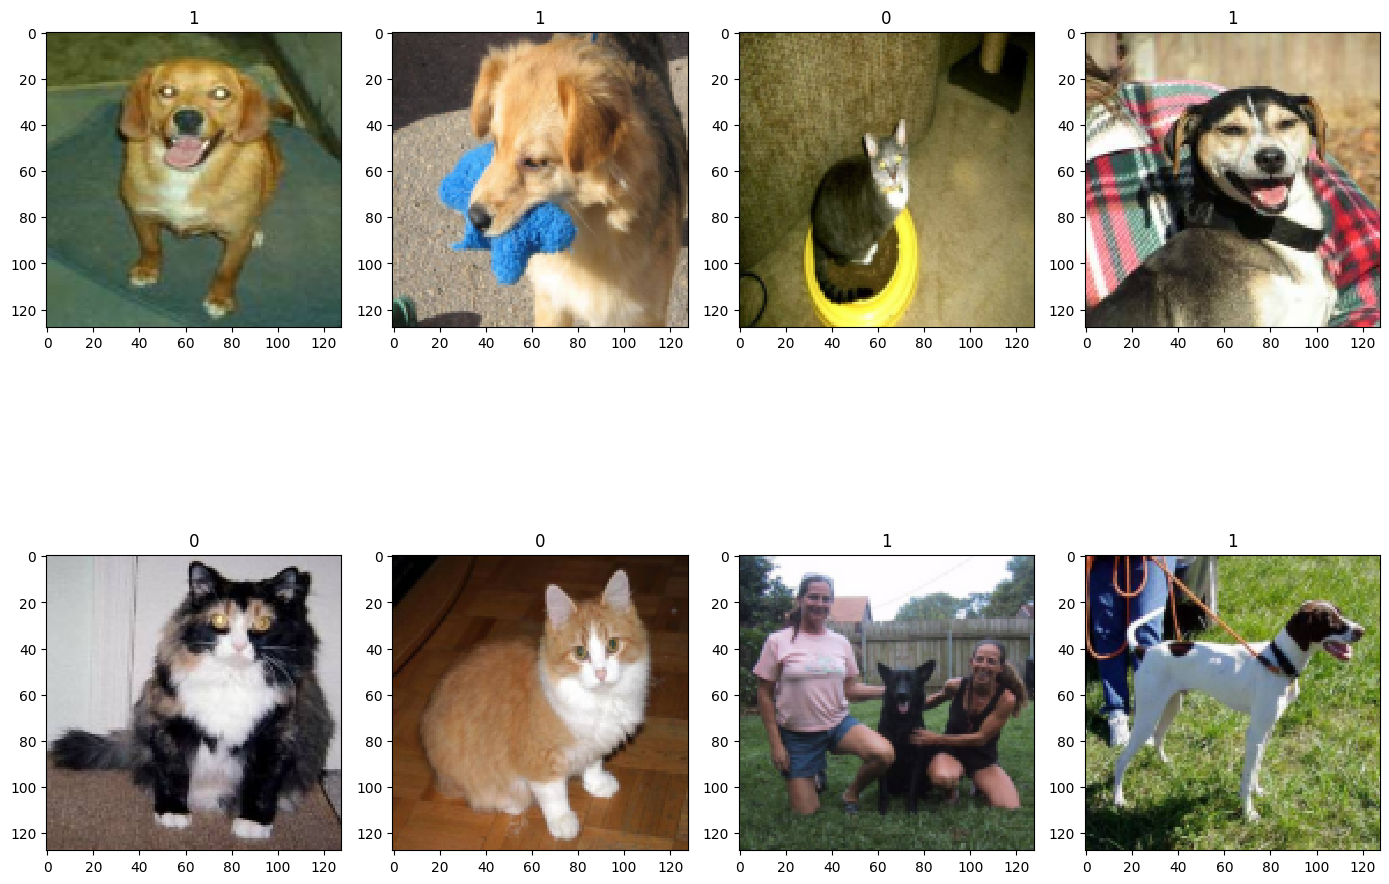

In [16]:
samples = random.choices(population=range(0,4000), k=8)

plt.figure(figsize=(14,12))

for idx,n in enumerate(samples):
    plt.subplot(2,4, idx+1)
    plt.imshow(trdt[n], cmap="Greys", interpolation='nearest')
    plt.title(trlb[n])

plt.tight_layout()
plt.show()

In [17]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(128,128,3)),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3,3), activation="relu", padding="same"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3,3), activation="relu", input_shape=(128,128,3)),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(512, activation="relu"),
    layers.Dropout(0.25),
    layers.Dense(2, activation="softmax")
])

model.summary()

2023-11-01 13:09:12.295738: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-01 13:09:12.295781: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-01 13:09:12.296789: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-01 13:09:12.399564: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-01 13:09:13.867012: W tensorflow/compiler/

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 31, 31, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 31, 31, 64)        0

2023-11-01 13:09:15.953134: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-01 13:09:16.208810: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-01 13:09:16.209044: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [18]:
model.compile(optimizer="adam",
              loss = 'sparse_categorical_crossentropy',
              metrics = ["accuracy"])

In [22]:
import time

start_time = time.time()
hist = model.fit(trdt.reshape(4000, 128,128,3), trlb, epochs=10, verbose=1,
                 validation_data = (tedt.reshape(1000,128,128,3), telb))

print("fit time : ", time.time() - start_time)

2023-11-01 13:36:15.303560: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 786432000 exceeds 10% of free system memory.
2023-11-01 13:36:16.206907: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 786432000 exceeds 10% of free system memory.


Epoch 1/10
125/125 [==============================] - 5s 43ms/step - loss: 0.5448 - accuracy: 0.7247 - val_loss: 0.6456 - val_accuracy: 0.6470
Epoch 2/10
125/125 [==============================] - 5s 39ms/step - loss: 0.5202 - accuracy: 0.7492 - val_loss: 0.6374 - val_accuracy: 0.6650
Epoch 3/10
125/125 [==============================] - 5s 39ms/step - loss: 0.4797 - accuracy: 0.7642 - val_loss: 0.5881 - val_accuracy: 0.7100
Epoch 4/10
125/125 [==============================] - 5s 39ms/step - loss: 0.4071 - accuracy: 0.8077 - val_loss: 0.6114 - val_accuracy: 0.6980
Epoch 5/10
125/125 [==============================] - 5s 39ms/step - loss: 0.3507 - accuracy: 0.8478 - val_loss: 0.6626 - val_accuracy: 0.7190
Epoch 6/10
125/125 [==============================] - 5s 39ms/step - loss: 0.2860 - accuracy: 0.8758 - val_loss: 0.6893 - val_accuracy: 0.7150
Epoch 7/10
125/125 [==============================] - 5s 39ms/step - loss: 0.2084 - accuracy: 0.9118 - val_loss: 0.7582 - val_accuracy: 0.7070

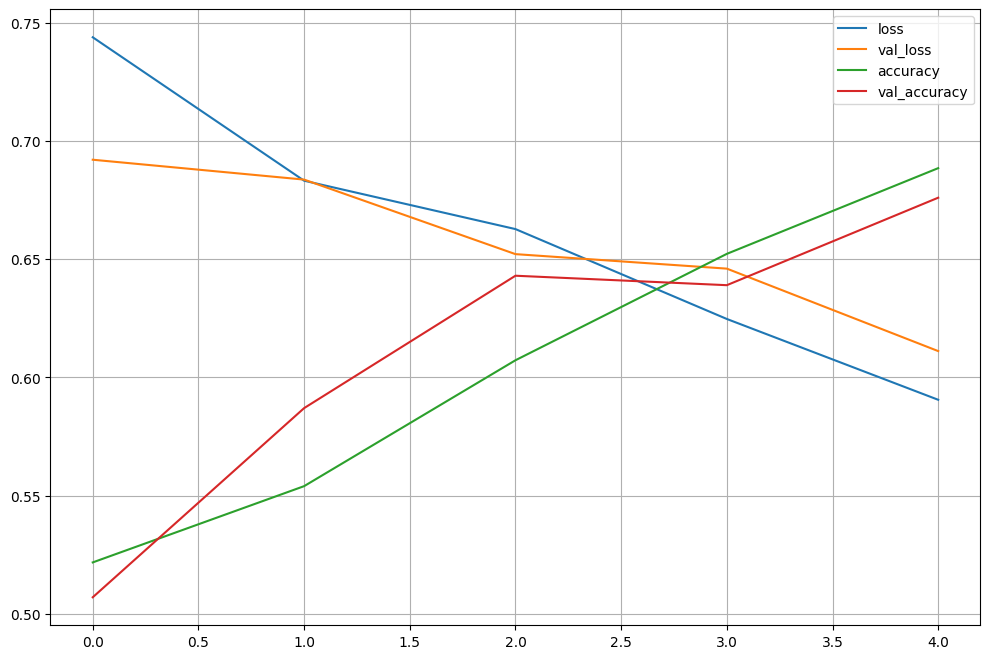

In [21]:
plot_target = ["loss", "val_loss", "accuracy", "val_accuracy"]
plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)

plt.legend()
plt.grid()
plt.show()